In [1]:
import numpy as np
import pandas as pd
import plotnine as p9

In [2]:
results = pd.read_csv("results.csv")
metadata = pd.read_csv("visium_meta.csv")

In [3]:
# mean r2 and rmse, aggregate folds
results = results.groupby(['dataset_name', 'function_name']).mean().reset_index()

In [4]:
results = results.merge(metadata, left_on='dataset_name', right_on='slide_name', how='left')

In [5]:
# how many datasets per major_labl
results.groupby('patient_group').count() / 6

,dataset_name,function_name,r2,rmse,slide_name,patient,patient_region_id,major_labl,batch,hca_sample_id
patient_group,,,,,,,,,,
group_1,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
group_2,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
group_3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [6]:
## patient_group, group_1 to myogenic, 2 to ischemic, 3 to fibrotic
results['patient_group'] = results['patient_group'].replace({'group_1': 'Myogenic\n(n=14)', 'group_2': 'Ischemic\n(n=9)', 'group_3': 'Fibrotic\n(n=5)'})

In [7]:
# Rename functions
name_dict = {'cosine': 'Cosine similarity',
             'jaccard': 'Jaccard index',
             'masked_spearman': 'Masked Spearman',
             'pearson': 'Pearson correlation',
             'morans': 'Moran\'s R',
             'spearman': 'Spearman correlation',
             }
results['function_name'].replace(name_dict, inplace=True)

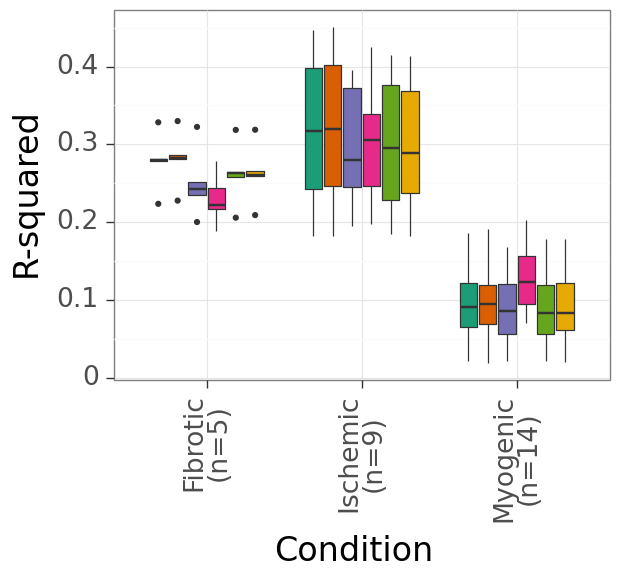

<ggplot: (8771594592247)>

In [8]:
# boxplot plot of r2 and rmse
(
        p9.ggplot(results, p9.aes(x='patient_group', y='r2', fill='function_name')) +
        p9.geom_boxplot() +
        p9.theme_bw(base_size=24) +
        p9.scale_fill_brewer(type='qual', palette='Dark2') +
        p9.theme(axis_text_x=p9.element_text(angle=90)) +
        p9.labs(x='Condition', y='R-squared', fill='Metric') +
        # remove legend
        p9.theme(legend_position='none')
        
)

In [9]:
results

,dataset_name,function_name,r2,rmse,slide_name,patient,patient_region_id,patient_group,major_labl,batch,hca_sample_id
0,AKK001_157785,Cosine similarity,0.181534,0.063141,AKK001_157785,P5,RZ/FZ_P5,Myogenic\n(n=14),FZ,10X,10X0027
1,AKK001_157785,Jaccard index,0.181537,0.062969,AKK001_157785,P5,RZ/FZ_P5,Myogenic\n(n=14),FZ,10X,10X0027
2,AKK001_157785,Masked Spearman,0.166306,0.065180,AKK001_157785,P5,RZ/FZ_P5,Myogenic\n(n=14),FZ,10X,10X0027
3,AKK001_157785,Moran's R,0.171505,0.062515,AKK001_157785,P5,RZ/FZ_P5,Myogenic\n(n=14),FZ,10X,10X0027
4,AKK001_157785,Pearson correlation,0.177936,0.063685,AKK001_157785,P5,RZ/FZ_P5,Myogenic\n(n=14),FZ,10X,10X0027
...,...,...,...,...,...,...,...,...,...,...,...
163,Visium_9_CK287,Jaccard index,0.297016,0.074635,Visium_9_CK287,P9,GT/IZ_P9,Ischemic\n(n=9),IZ,ACH,ACH0012
164,Visium_9_CK287,Masked Spearman,0.265360,0.078565,Visium_9_CK287,P9,GT/IZ_P9,Ischemic\n(n=9),IZ,ACH,ACH0012
165,Visium_9_CK287,Moran's R,0.275790,0.073458,Visium_9_CK287,P9,GT/IZ_P9,Ischemic\n(n=9),IZ,ACH,ACH0012
166,Visium_9_CK287,Pearson correlation,0.276536,0.077730,Visium_9_CK287,P9,GT/IZ_P9,Ischemic\n(n=9),IZ,ACH,ACH0012


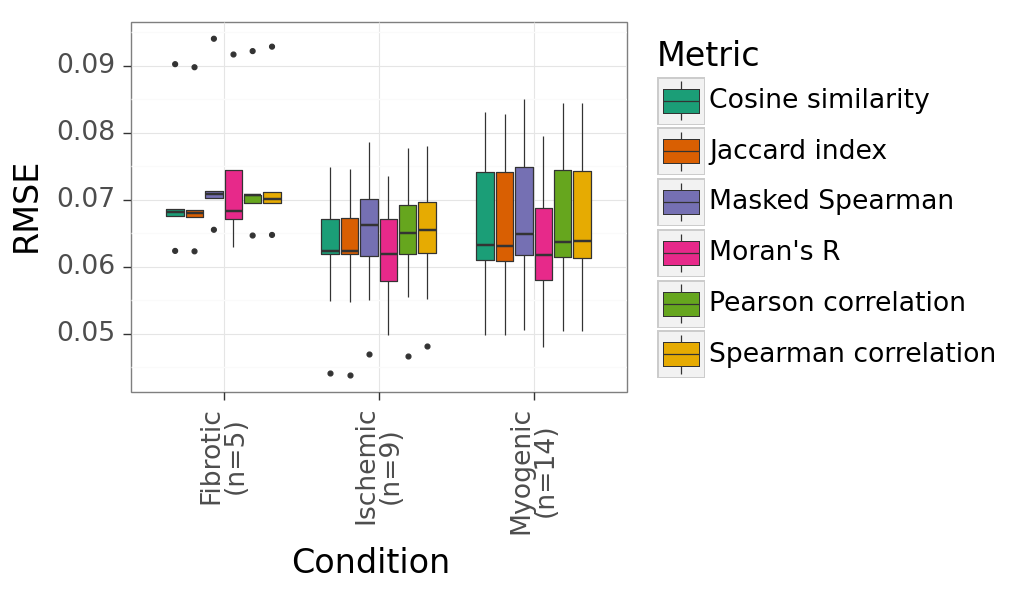

<ggplot: (8771594592073)>

In [10]:
# boxplot plot of r2 and rmse
(
        p9.ggplot(results, p9.aes(x='patient_group', y='rmse', fill='function_name')) +
        p9.geom_boxplot() +
        p9.theme_bw(base_size=24) +
        p9.scale_fill_brewer(type='qual', palette='Dark2') +
        p9.theme(axis_text_x=p9.element_text(angle=90)) +
        p9.labs(x='Condition', y='RMSE', fill='Metric')
        
)

In [17]:
results.groupby(['function_name', 'patient_group'])[['r2', 'rmse']].mean()

r2      rmse
function_name        patient_group                       
Cosine similarity    Fibrotic\n(n=5)   0.278504  0.071356
                     Ischemic\n(n=9)   0.323067  0.062145
                     Myogenic\n(n=14)  0.100996  0.066080
Jaccard index        Fibrotic\n(n=5)   0.281604  0.071160
                     Ischemic\n(n=9)   0.326157  0.062022
                     Myogenic\n(n=14)  0.102252  0.065940
Masked Spearman      Fibrotic\n(n=5)   0.250456  0.074341
                     Ischemic\n(n=9)   0.294670  0.064655
                     Myogenic\n(n=14)  0.090849  0.067203
Moran's R            Fibrotic\n(n=5)   0.229934  0.072898
                     Ischemic\n(n=9)   0.301774  0.061949
                     Myogenic\n(n=14)  0.124827  0.063427
Pearson correlation  Fibrotic\n(n=5)   0.261916  0.073558
                     Ischemic\n(n=9)   0.302643  0.064132
                     Myogenic\n(n=14)  0.095383  0.066693
Spearman correlation Fibrotic\n(n=5)   0.262625  0.073660
                     Ischemic\n(n=9)   0.298119  0.064660
                     Myogenic\n(n=14)  0.096143  0.066690